In [3]:
# Import MNIST data and python basics
import os, sys
import platform
import pickle
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from cnn_from_scratch.datasets import load_mnist, show_mnist_digit, mnist_model_examination
from cnn_from_scratch.trainer import CNN_trainer
from cnn_from_scratch.activation_function import *

do_quick_training = False

if platform.system() == 'Windows':
    work_dir = 'C:/Users/jiang/workspace/cnn_from_scratch/'
elif platform.system() == 'Darwin':
    work_dir = '/Users/idchiang/working/cnn_from_scratch/'
filename_mymodel = work_dir + '/model/MyTrainer_0918.pkl'
filename_mlp = work_dir + '/model/MLPTrainer_0918.pkl'

x_train, y_train, x_test, y_test = load_mnist()

if do_quick_training:
    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_test = x_test[:5000]
    y_test = y_test[:5000]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


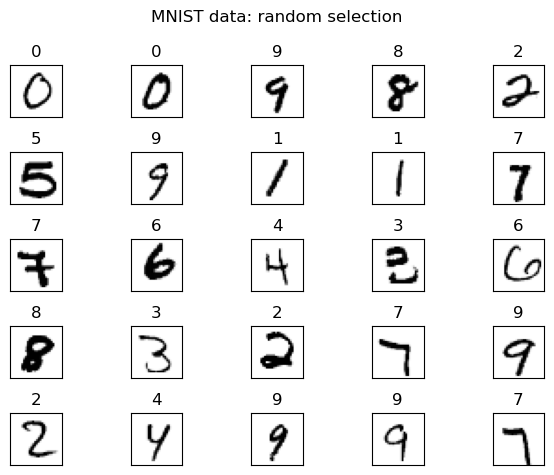

In [4]:
# Random MNIST visualization
plt.close('all')
plt.ion()
fig, axs = plt.subplots(5, 5)
idxs = np.random.randint(len(x_train), size=25)
for q in range(25):
    i, j = q // 5, q % 5
    show_mnist_digit(x_train[idxs[q]], y_train[idxs[q]], axs[i, j])
fig.suptitle('MNIST data: random selection')
fig.tight_layout()

In [5]:
# Some shared parameters
model_input_dim = x_train.shape[1]
model_output_dim = y_train.shape[1]

hidden_layer_sizes = [270, 90, 30]
activation = 'relu'

max_iter = 20
learning_rate_init = 1e-2
batch_size = 10  # Sorry, something is wrong now

/Users/idchiang/working/cnn_from_scratch/cnn_from_scratch/trainer.py:128: UserWarning: CNN_trainer.train_model() in {self.name}: unsolved issue with batch_size > 1. Suggesting batch_size = 1 for now.
  warnings.warn("CNN_trainer.train_model() in {self.name}: unsolved issue with batch_size > 1. Suggesting batch_size = 1 for now.")


# CNN_trainer MyTrainer_0916, Epoch: 1/20 - 09:17:08
          - Train loss = 0.130; Test loss = 0.127
          - Train acc = 82.6%; Test acc = 83.1%
# CNN_trainer MyTrainer_0916, Epoch: 2/20 - 09:19:08
          - Train loss = 0.081; Test loss = 0.078
          - Train acc = 88.9%; Test acc = 89.4%
# CNN_trainer MyTrainer_0916, Epoch: 3/20 - 09:21:05
          - Train loss = 0.063; Test loss = 0.061
          - Train acc = 91.0%; Test acc = 91.5%
# CNN_trainer MyTrainer_0916, Epoch: 4/20 - 09:23:03
          - Train loss = 0.054; Test loss = 0.052
          - Train acc = 92.2%; Test acc = 92.6%
# CNN_trainer MyTrainer_0916, Epoch: 5/20 - 09:25:02
          - Train loss = 0.048; Test loss = 0.046
          - Train acc = 93.0%; Test acc = 93.1%
# CNN_trainer MyTrainer_0916, Epoch: 6/20 - 09:27:02
          - Train loss = 0.044; Test loss = 0.043
          - Train acc = 93.7%; Test acc = 93.7%
# CNN_trainer MyTrainer_0916, Epoch: 7/20 - 09:29:01
          - Train loss = 0.040; Test loss

/Users/idchiang/working/cnn_from_scratch/cnn_from_scratch/trainer.py:240: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


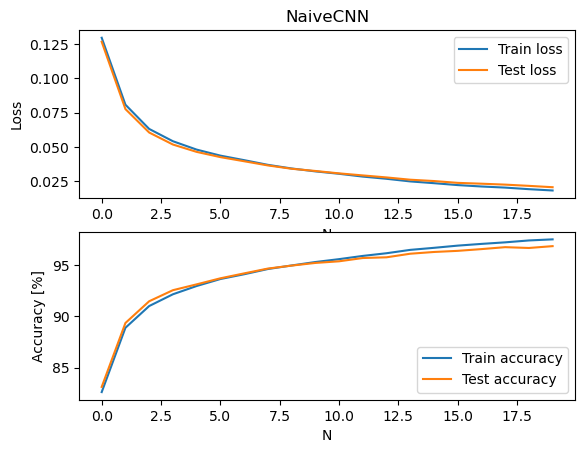

In [6]:
# Train our own model
my_trainer = CNN_trainer(name='MyTrainer_0916')
my_trainer.set_data(x_train, y_train, x_test, y_test)
my_trainer.naive_model(model_input_dim=model_input_dim,
                       model_output_dim=model_output_dim,
                       hidden_dims=hidden_layer_sizes,
                       hidden_act_func=ReLUActFunc(),
                       output_act_func=SigmoidActFunc())
my_trainer.train_model(n_epoch=max_iter,
                       batch_size=batch_size,
                       learning_rate=learning_rate_init,
                       do_acc=True)
my_trainer.savefile(filename_mymodel)

Iteration 1, loss = 0.23751027
Iteration 1, loss = 0.11171324
Iteration 1, loss = 0.07991213
Iteration 1, loss = 0.06236123
Iteration 1, loss = 0.05164249
Iteration 1, loss = 0.04191450
Iteration 1, loss = 0.03837934
Iteration 1, loss = 0.03529995
Iteration 1, loss = 0.02999450
Iteration 1, loss = 0.02693214
Iteration 1, loss = 0.02324124
Iteration 1, loss = 0.02334000
Iteration 1, loss = 0.01978099
Iteration 1, loss = 0.02136273
Iteration 1, loss = 0.01897145
Iteration 1, loss = 0.01459154
Iteration 1, loss = 0.01309332
Iteration 1, loss = 0.01548157
Iteration 1, loss = 0.01150631
Iteration 1, loss = 0.01363833
MLPClassifier Final train accuracy: 99.63%
MLPClassifier Final train loss: 0.014


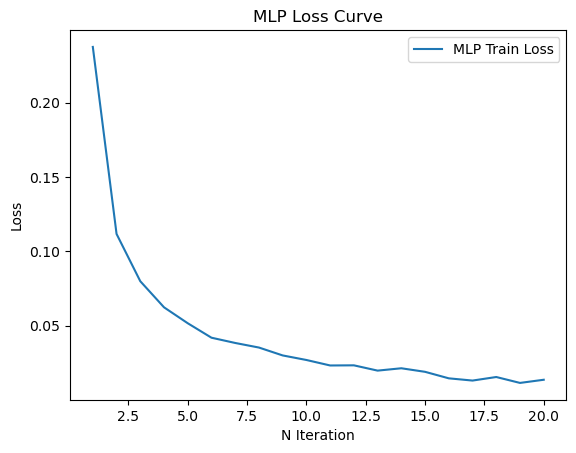

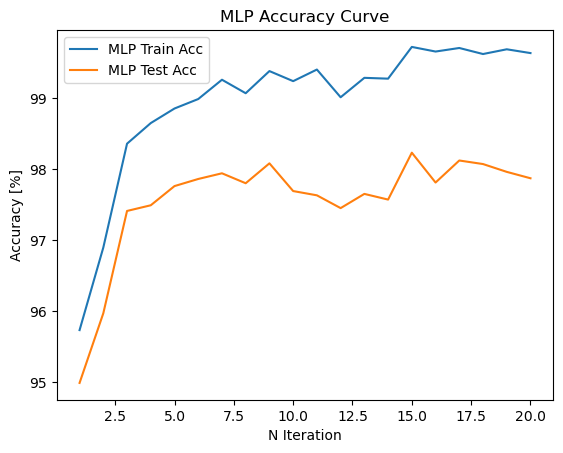

In [7]:
# Benchmark performance with sklearn

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=0.,
                    solver='sgd', verbose=True, batch_size=batch_size,
                    activation=activation, learning_rate_init=learning_rate_init)

mlp_train_acc_arr = []
mlp_test_acc_arr = []
classes = [num for num in range(10)]
for i in range(max_iter):
    mlp.partial_fit(x_train, y_train.argmax(axis=1), classes=classes)
    mlp_train_acc_arr.append(mlp.score(x_train, y_train.argmax(axis=1)))
    mlp_test_acc_arr.append(mlp.score(x_test, y_test.argmax(axis=1)))

# Predict and evaluate
mlp_final_loss = mlp.loss_
print(f"MLPClassifier Final train accuracy: {mlp_train_acc_arr[-1] * 100:.2f}%")
print(f"MLPClassifier Final train loss: {mlp_final_loss:.3f}")

mlp_train_loss = mlp.loss_curve_
plt.close('all')
plt.figure()
plt.plot(np.arange(len(mlp_train_loss)) + 1, mlp_train_loss, label='MLP Train Loss')
plt.xlabel('N Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Loss Curve')

plt.figure()
plt.plot(np.arange(len(mlp_train_loss)) + 1, np.array(mlp_train_acc_arr) * 100, label='MLP Train Acc')
plt.plot(np.arange(len(mlp_train_loss)) + 1, np.array(mlp_test_acc_arr) * 100, label='MLP Test Acc')
plt.xlabel('N Iteration')
plt.ylabel('Accuracy [%]')
plt.legend()
plt.title('MLP Accuracy Curve')

# save
with open(filename_mlp,'wb') as f:
    pickle.dump(mlp, f)


/var/folders/xs/xkl3k2xs3c95gzcqpwxgqg5c0000gn/T/ipykernel_916/1134993730.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xs/xkl3k2xs3c95gzcqpwxgqg5c0000gn/T/ipykernel_916/1134993730.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


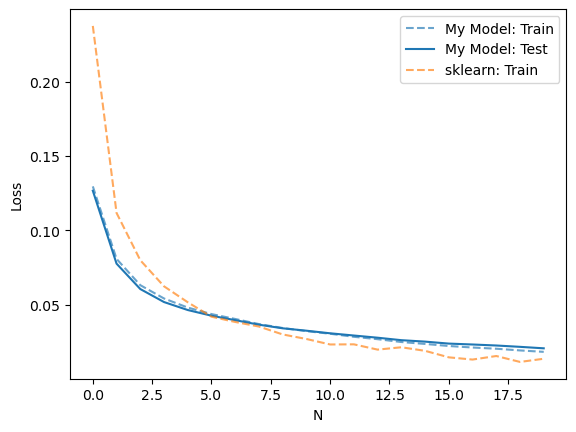

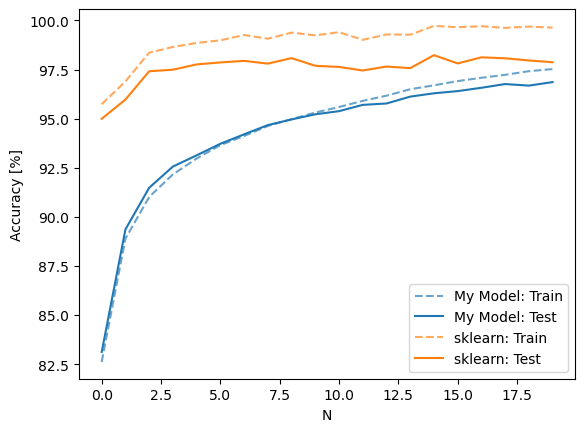

In [13]:
# Plot: my model & sklearn

# Loss history
fig, ax = plt.subplots()
ax.plot(np.arange(len(my_trainer.history_train_loss)), my_trainer.history_train_loss,
        color='tab:blue', label='My Model: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(my_trainer.history_train_loss)), my_trainer.history_test_loss,
        color='tab:blue', label='My Model: Test')
ax.plot(np.arange(len(mlp_train_loss)), mlp_train_loss,
        color='tab:orange', label='sklearn: Train', linestyle='dashed', alpha=2/3)
ax.set_ylabel('Loss')
ax.set_xlabel('N')
ax.legend()

fig.show()

# Accuracy history
fig, ax = plt.subplots()
ax.plot(np.arange(len(my_trainer.history_train_loss)), np.array(my_trainer.history_train_acc),
        color='tab:blue', label='My Model: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(my_trainer.history_train_loss)), np.array(my_trainer.history_test_acc),
        color='tab:blue', label='My Model: Test')
ax.plot(np.arange(len(mlp_train_acc_arr)), np.array(mlp_train_acc_arr) * 100,
        color='tab:orange', label='sklearn: Train', linestyle='dashed', alpha=2/3)
ax.plot(np.arange(len(mlp_test_acc_arr)), np.array(mlp_test_acc_arr) * 100,
        color='tab:orange', label='sklearn: Test')
ax.set_ylabel('Accuracy [%]')
ax.set_xlabel('N')
ax.legend()

fig.show()

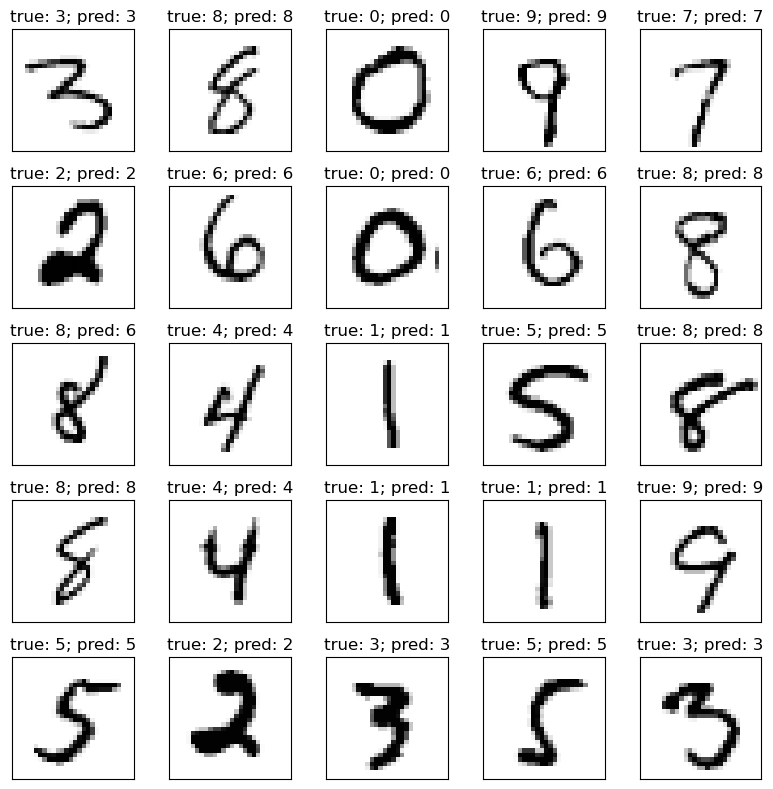

In [9]:
# load: both my & sklearn model for demonstration
my_trainer2 = CNN_trainer.loadfile(filename_mymodel)

with open(filename_mlp, 'rb') as f:
    mlp2 = pickle.load(f)

mnist_model_examination(my_trainer2, x_test, y_test)

<Axes: xlabel='Predicted', ylabel='True'>

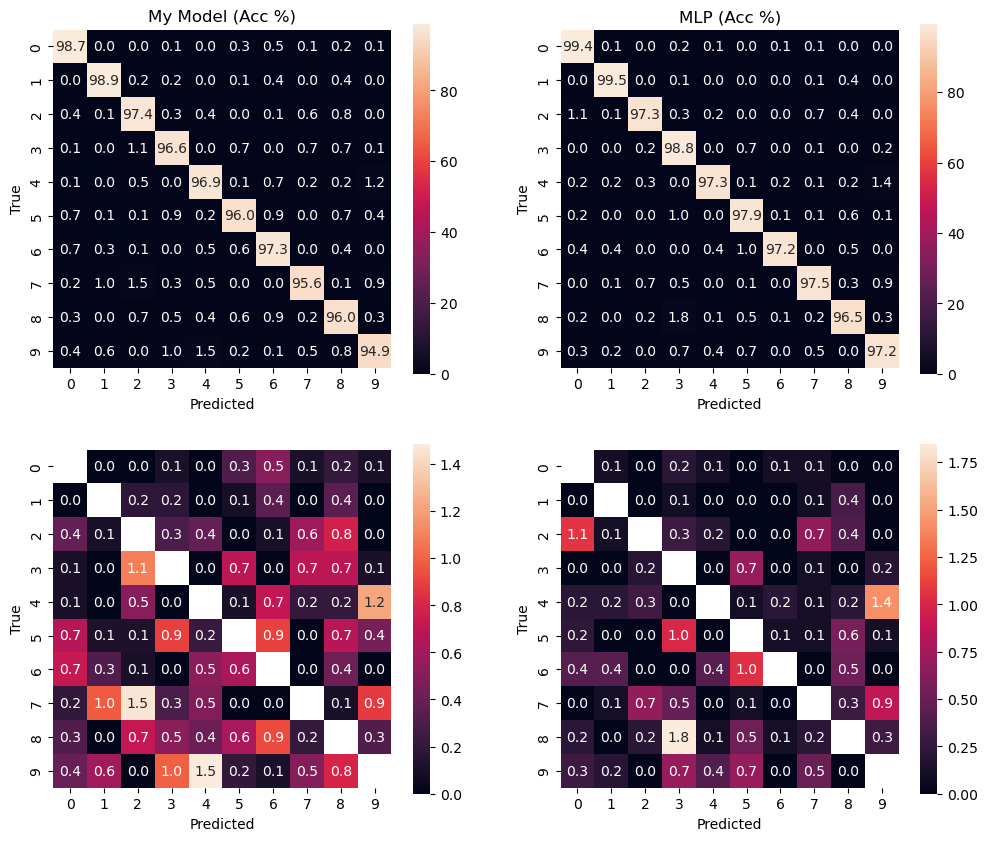

In [32]:
# Heatmap
import pandas as pd
import seaborn as sns
from collections import Counter

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
y_true = np.argmax(y_test, axis=1)
counter = Counter(y_true)

# My model
y_pred_my = []
for x_in in x_test:
    a_pred = my_trainer2.predict(x_in)
    y_pred_my.append(np.argmax(a_pred))
df_my = pd.DataFrame(
    data = {'True': y_true,
            'Predicted': y_pred_my}
)
ax = axs[0, 0]
pivot_table_my = df_my.pivot_table(index='True', columns='Predicted', aggfunc='size', fill_value=0)
pivot_table_my = pivot_table_my.astype(float)
for i in range(10):
    pivot_table_my.loc[i] = pivot_table_my.loc[i].values / counter[i] * 100
sns.heatmap(pivot_table_my, annot=True, square=True, ax=ax, fmt=".1f")
ax.set_title('My Model (Acc %)')

pivot_table_my_cropped = pivot_table_my.copy()
for i in range(10):
    pivot_table_my_cropped.loc[i, i] = np.nan
sns.heatmap(pivot_table_my_cropped, annot=True, square=True, ax=axs[1, 0], fmt=".1f")

# MLP
a_pred_mlp = mlp2.predict(x_test)
# y_pred_mlp = np.argmax(a_pred_mlp, axis=1)
df_mlp = pd.DataFrame(
    data = {'True': y_true,
            'Predicted': a_pred_mlp}
)
ax = axs[0, 1]
pivot_table_mlp = df_mlp.pivot_table(index='True', columns='Predicted', aggfunc='size', fill_value=0)
pivot_table_mlp = pivot_table_mlp.astype(float)
for i in range(10):
    pivot_table_mlp.loc[i] = pivot_table_mlp.loc[i].values / counter[i] * 100
sns.heatmap(pivot_table_mlp, annot=True, square=True, ax=ax, fmt=".1f")
ax.set_title('MLP (Acc %)')

pivot_table_mlp_cropped = pivot_table_mlp.copy()
for i in range(10):
    pivot_table_mlp_cropped.loc[i, i] = np.nan
sns.heatmap(pivot_table_mlp_cropped, annot=True, square=True, ax=axs[1, 1], fmt=".1f")
